#Linear Regression

Regression is a method of moddeling a target value based on predicators. It is based on number of independent and dependent variables and linear relationship between them.

Linear Regression is a supervised learning method in which we have a single independent variable and there is a linear relationship between it and dependent variables. Based on data points, we try to find that linear relationship.

Loss function used in linear regression is Least Squared Error and the cost function is Mean Squared Error(MSE).

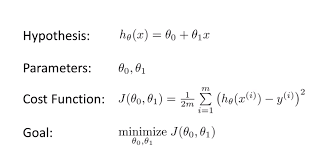

In this linear regression model, I am predicting stock prices for next 10 days. 

In [32]:
# !pip install quandl
import pandas as pd
import quandl, math, datetime
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

**Getting the dataframe from quandl**



In [33]:
quandl.ApiConfig.api_key="bRRJmPUxWgvSGV7gF-6m"
df=quandl.get('WIKI/GOOGL')

In [34]:
print(df.head())
print(df.columns)

              Open    High     Low  ...   Adj. Low  Adj. Close  Adj. Volume
Date                                ...                                    
2004-08-19  100.01  104.06   95.96  ...  48.128568   50.322842   44659000.0
2004-08-20  101.01  109.08  100.50  ...  50.405597   54.322689   22834300.0
2004-08-23  110.76  113.48  109.05  ...  54.693835   54.869377   18256100.0
2004-08-24  111.24  111.60  103.57  ...  51.945350   52.597363   15247300.0
2004-08-25  104.76  108.00  103.88  ...  52.100830   53.164113    9188600.0

[5 rows x 12 columns]
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')


In [35]:
df=df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT']=(df['Adj. High']-df['Adj. Close'])/df['Adj. Close'] *100.0
df['PCT_change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open'] *100.0
df=df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True)
forecast_out=int(math.ceil(0.01*len(df)))
df['label']=df[forecast_col].shift(-forecast_out)

In [36]:
print(df)
print(df.columns)

             Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                 
2004-08-19    50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20    54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23    54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24    52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25    53.164113  1.886792    1.183658    9188600.0  71.219849
...                 ...       ...         ...          ...        ...
2018-03-21  1094.000000  1.343693    0.130884    1990515.0        NaN
2018-03-22  1053.150000  2.921711   -2.487014    3418154.0        NaN
2018-03-23  1026.550000  3.918952   -2.360729    2413517.0        NaN
2018-03-26  1054.090000  0.491419    0.332191    3272409.0        NaN
2018-03-27  1006.940000  5.720301   -5.353887    2940957.0        NaN

[3424 rows x 5 columns]
Index(['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume', 'labe

**Getting training set from the dataframe**

In [37]:
X=np.array(df.drop(['label'], 1))
X=preprocessing.scale(X)
X=X[:-forecast_out]
X_lately=X[-forecast_out:]

df.dropna(inplace=True)
y=np.array(df['label'])

print(X.shape, y.shape)

(3389, 4) (3389,)


**Training the model and saving it**

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf=LinearRegression()
clf.fit(x_train, y_train)

acc=clf.score(x_test, y_test)
print(acc)

0.9779051615474188


**Making prediction**

In [39]:
forecast_set = clf.predict(X_lately)
print(forecast_set, acc, forecast_out)

[1076.02758223 1090.54274383 1104.58048278 1099.29650341 1092.83432083
 1090.2029309  1088.63772899 1085.62000976 1079.44280803 1075.07948749
 1072.76095508 1092.01692225 1110.39361382 1115.01841079 1129.85571785
 1133.89560072 1132.60292436 1130.08365036 1131.89082061 1150.04369482
 1149.31985762 1159.4210418  1156.01717688 1163.73776447 1183.84467396
 1196.30886023 1190.65049672 1202.58197831 1208.13577403 1206.14402933
 1196.90454124 1202.53405885 1201.04461618 1136.67041242 1083.65320859] 0.9779051615474188 35


In [40]:
df['Forecast']=np.nan

last_date=df.iloc[-1].name
last_unix=last_date.timestamp()
one_day=86400
next_unix=last_unix+one_day

for i in forecast_set:
  next_date=datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date]=[np.nan for _ in range(len(df.columns)-1)] + [i]

print(df.tail())

            Adj. Close  HL_PCT  PCT_change  Adj. Volume  label     Forecast
Date                                                                       
2018-03-08         NaN     NaN         NaN          NaN    NaN  1196.904541
2018-03-09         NaN     NaN         NaN          NaN    NaN  1202.534059
2018-03-10         NaN     NaN         NaN          NaN    NaN  1201.044616
2018-03-11         NaN     NaN         NaN          NaN    NaN  1136.670412
2018-03-12         NaN     NaN         NaN          NaN    NaN  1083.653209


**Plotting the new predictions**

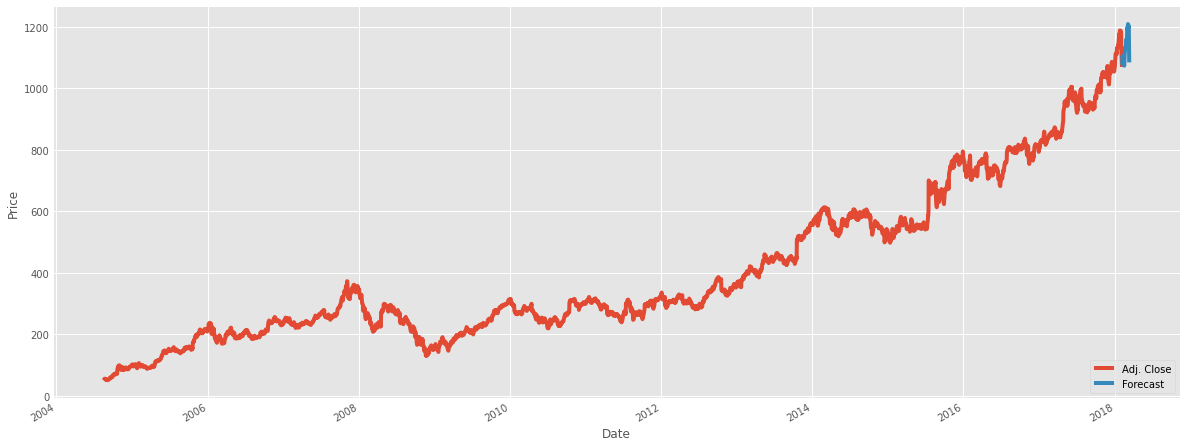

In [41]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Linear Regression Best Fit Line


In [42]:
from statistics import mean

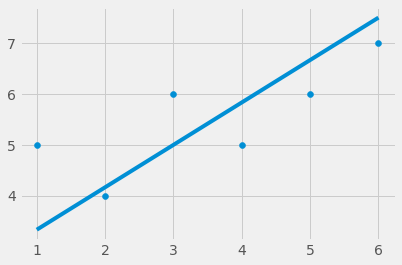

In [43]:
xs=np.array([1,2,3,4,5,6])
ys=np.array([5,4,6,5,6,7])

def best_fit_slope_and_intercept(xs, ys):
  m=((mean(xs)*mean(ys))-(mean(xs*ys)))/((mean(xs)**2)-(mean(xs**2)))
  b=mean(ys)-m*mean(xs)
  return m,b

m,b = best_fit_slope_and_intercept(xs, ys)

regression_line=[m*x+b for x in xs]

plt.style.use('fivethirtyeight')
plt.scatter(xs, ys)
plt.plot(xs, regression_line)
plt.show()

**R squared value**

In [44]:
def squared_error(y_org, y_line):
  return sum((y_org-y_line)**2)

def coefficient_of_determination(y_org, y_line):
  y_mean=[mean(y_org) for _ in y_org]
  square_mean=squared_error(y_org, y_mean)
  square_regg=squared_error(y_org, y_line)
  return 1-(square_regg/square_mean)

r_squared=coefficient_of_determination(ys, regression_line)
print(r_squared)

0.2579365079365079
